# Аналитика в авиакомпании.
Нам нужно изучить данные по количеству рейсов в разные города России.

1. Импорт и изучение данных. Корректировка данных, если необходимо
2. Работа с данными: изучить топ-10 городов по количеству рейсов; построить графики, которые помогут сделать выводы по данным
3. Общий вывод

## 1. Импорт и изучение данных. Корректировка данных, если необходимо

Сначала импортируем файлы м изучим данные в них. Также необходимо проверить типы данных на корректность

In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

In [4]:
df = pd.read_csv('/Users/kirillanosov/Downloads/query_1.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
df.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [7]:
df.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [8]:
df1 = pd.read_csv('/Users/kirillanosov/Downloads/query_3.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
df1.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [11]:
df1.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Тип float в столбце average_flights не очень удобен для построений графика. Поэтому предлагаю округлить значения вверх, а потом привести их к типу int. Можно было бы просто привести дроби в целочисленные значения, но они округляют вниз, а это не всегда будет отражать реальные цифры

In [12]:
df1['average_flights'] = df1['average_flights'].apply(np.ceil)
df1['average_flights'] = df1['average_flights'].astype('int')
df1.head(10)

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,3
3,Архангельск,6
4,Астрахань,3
5,Барнаул,3
6,Белгород,6
7,Белоярский,2
8,Благовещенск,1
9,Братск,1


Таблица с моделями самолетов небольшая, всего 8 позиций. Но это нормально, так как рынок граждаских самолетов в принципе не отличается большим разнообразием. Таблица по городам уже больше. С ней пришлось немного поработать: мы округлили значения столбца **average_flights**  и привели их к целочисленным значениям. Это сделает дальнейшее взаимодействие с этими данными более приятным. 

## 2. Работа с данными: изучить топ-10 городов по количеству рейсов; построить графики, которые помогут сделать выводы по данным

Выберем топ-10 городов по количеству рейсов:

In [13]:
df1 = df1.sort_values(by = 'average_flights', ascending = False)


In [14]:
df1.head(10)

,city,average_flights
43,Москва,130
70,Санкт-Петербург,32
54,Новосибирск,18
33,Красноярск,12
20,Екатеринбург,12
63,Пермь,11
67,Ростов-на-Дону,11
10,Брянск,10
84,Ульяновск,10
74,Сочи,10


In [15]:
top10 = df1.query('average_flights >= 9.580645')
top10

,city,average_flights
43,Москва,130
70,Санкт-Петербург,32
54,Новосибирск,18
33,Красноярск,12
20,Екатеринбург,12
63,Пермь,11
67,Ростов-на-Дону,11
10,Брянск,10
84,Ульяновск,10
74,Сочи,10


Построим **графики**.


Сначала посмотрим **топ-10 городов** и количество рейсов:

Text(0.5, 1.0, 'Среднее количество рейсов в топ-10 самых популярных направлений в России')

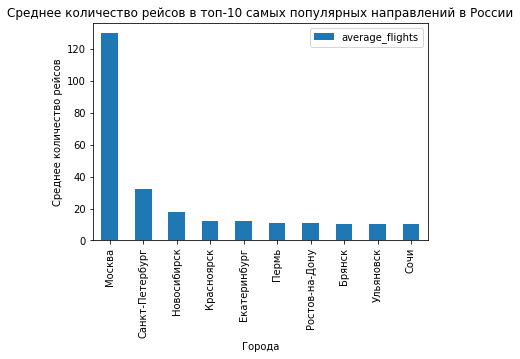

In [16]:
top10.plot(kind = 'bar', x = 'city', y = 'average_flights')
plt.xlabel('Города')
plt.ylabel('Среднее количество рейсов')
plt.title('Среднее количество рейсов в топ-10 самых популярных направлений в России')

Можно было бы сказать, что топ-10 городов по количеству рейсов не вызывают удивления. Города-милионники **Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург** всегда будут в топе. Но я еще ожидал увидеть **Казань**. Этот город многие называют третьей столицей, он очень бурно развивается и является довольно популярным направлением для внутреннего туризма. Возможно дело в том, что до Казани многие привыкли добираться на поездах и машинах, удобные наземные маршурты есть из практически любого города Европейской части России. 
Кого-то может удивить **Красноярск**. Но это один из крупнейших городов Сибири и одна из точек, куда прибывают туристы, чтобы посетить те же Ленские столбы. Меня из всех городов в топе удивил **Ульяновск**. Это не город-милионник, там не проходит много фестивалей. 

Теперь **модели самолетов** и количество рейсов:

Text(0.5, 1.0, 'Самые популярные модели самолетов во внутренних авиаперевозках')

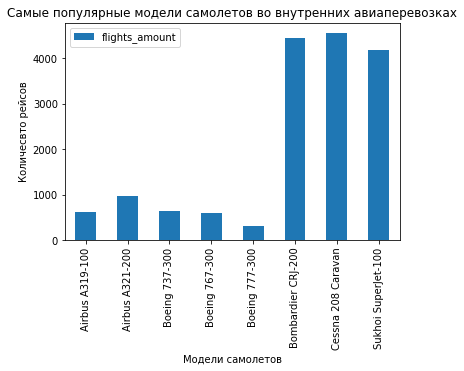

In [17]:
df.plot(kind = 'bar', x = 'model', y = 'flights_amount')
plt.xlabel('Модели самолетов')
plt.ylabel('Количесвто рейсов')
plt.title('Самые популярные модели самолетов во внутренних авиаперевозках')

Модели **Bombardier** и **Cessna** не так известны, особенно в сравнении с Аэробусами и Боингами. Но их популярность логична: это небольшие самолеты для региональных внутренних рейсов. **Sukhoi** тоже рассчитан на перевозку до 3000 - 4600 км и он дешевле **Airbus** и **Boeing**.

Города и количество рейсов:

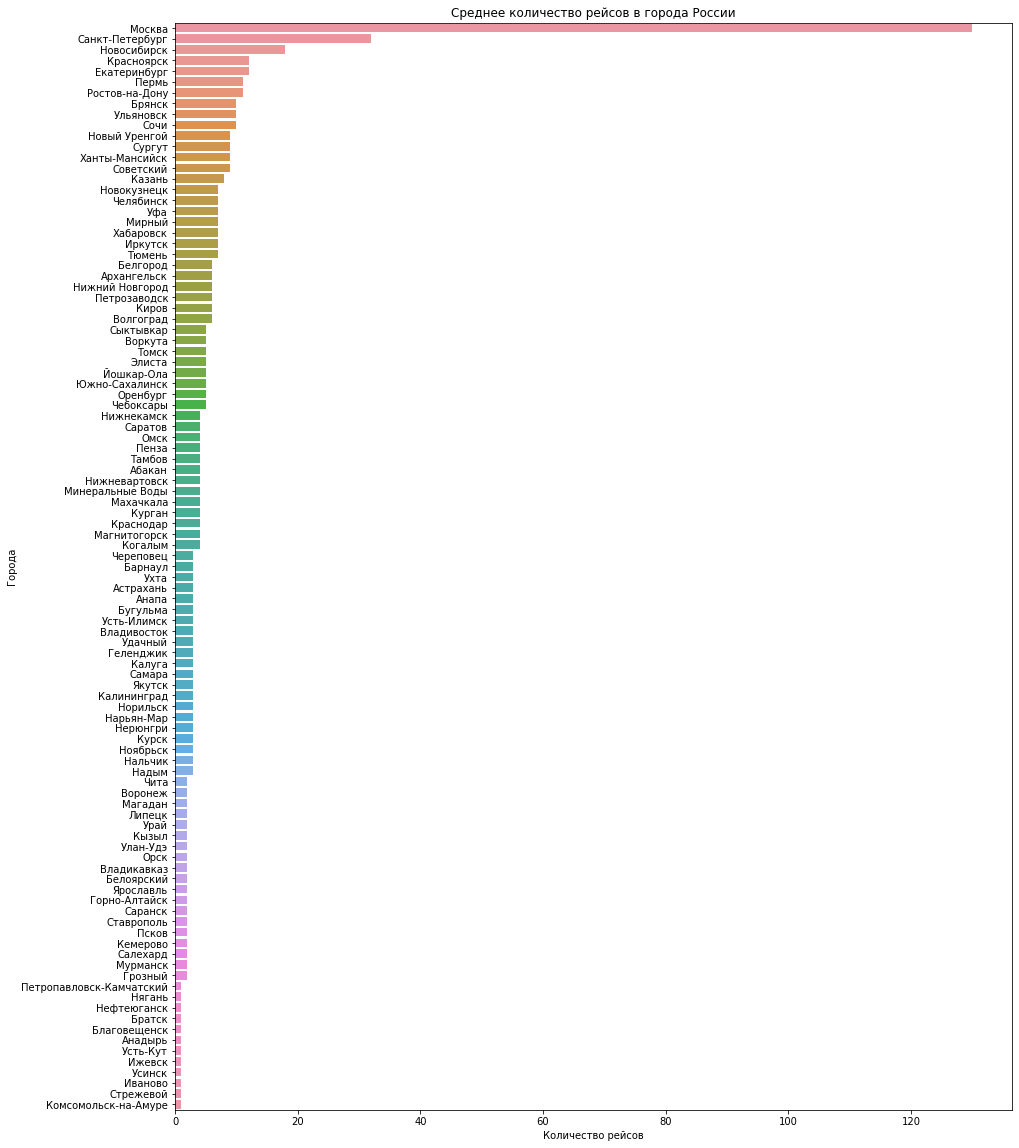

In [18]:
plt.figure(figsize=(15,20))
sns.barplot(data = df1, y = 'city', x = 'average_flights')
plt.xlabel('Количество рейсов')
plt.ylabel('Города')
plt.title('Среднее количество рейсов в города России')
plt.gca()

Из интересного в этой табличке можно выделить малое количество рейсов в **города Дальнего Востока**. Выделяется только **Владивосток** и **Хабаровск**. Связано это в стем, что регион не очень развит, билеты туда дорогие, поэтому не все могут позволить себе туда летать. 

Еще можно отметить **Ярославль**. Туда и правда летает мало рейсов, но в город ездят в основном на наземном транспорте

С помощью графиков мы получиили наглядное представление о положении авиаперевозок в России. Отобразим это нак карте для большей наглядности:

In [19]:
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [20]:
locator = Nominatim(user_agent='myGeocoder')

In [24]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

df1['location'] = df1['city'].apply(geocode)
df1.head(10)


,city,average_flights,location,point
43,Москва,130,"(Москва, Центральный административный округ, М...","(55.7504461, 37.6174943, 0.0)"
70,Санкт-Петербург,32,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.9606739, 30.1586551, 0.0)"
54,Новосибирск,18,"(Новосибирск, городской округ Новосибирск, Нов...","(55.0282171, 82.9234509, 0.0)"
33,Красноярск,12,"(Красноярск, городской округ Красноярск, Красн...","(56.0090968, 92.8725147, 0.0)"
20,Екатеринбург,12,"(Екатеринбург, городской округ Екатеринбург, С...","(56.839104, 60.60825, 0.0)"
63,Пермь,11,"(Пермь, Пермский край, Приволжский федеральный...","(58.014965, 56.246723, 0.0)"
67,Ростов-на-Дону,11,"(Ростов-на-Дону, городской округ Ростов-на-Дон...","(47.2213858, 39.7114196, 0.0)"
10,Брянск,10,"(Брянск, городской округ Брянск, Брянская обла...","(53.2423778, 34.3668288, 0.0)"
84,Ульяновск,10,"(Ульяновская область, Приволжский федеральный ...","(54.1463177, 47.2324921, 0.0)"
74,Сочи,10,"(Сочи, городской округ Сочи, релейшен для роут...","(43.5854823, 39.723109, 0.0)"


In [25]:
df1['point'] = df1['location'].apply(lambda loc: tuple(loc.point) if loc else None)



In [27]:
df1[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df1['point'].tolist(), index=df1.index)
df1.head(10)

,city,average_flights,location,point,latitude,longitude,altitude
43,Москва,130,"(Москва, Центральный административный округ, М...","(55.7504461, 37.6174943, 0.0)",55.750446,37.617494,0.0
70,Санкт-Петербург,32,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.9606739, 30.1586551, 0.0)",59.960674,30.158655,0.0
54,Новосибирск,18,"(Новосибирск, городской округ Новосибирск, Нов...","(55.0282171, 82.9234509, 0.0)",55.028217,82.923451,0.0
33,Красноярск,12,"(Красноярск, городской округ Красноярск, Красн...","(56.0090968, 92.8725147, 0.0)",56.009097,92.872515,0.0
20,Екатеринбург,12,"(Екатеринбург, городской округ Екатеринбург, С...","(56.839104, 60.60825, 0.0)",56.839104,60.608250,0.0
63,Пермь,11,"(Пермь, Пермский край, Приволжский федеральный...","(58.014965, 56.246723, 0.0)",58.014965,56.246723,0.0
67,Ростов-на-Дону,11,"(Ростов-на-Дону, городской округ Ростов-на-Дон...","(47.2213858, 39.7114196, 0.0)",47.221386,39.711420,0.0
10,Брянск,10,"(Брянск, городской округ Брянск, Брянская обла...","(53.2423778, 34.3668288, 0.0)",53.242378,34.366829,0.0
84,Ульяновск,10,"(Ульяновская область, Приволжский федеральный ...","(54.1463177, 47.2324921, 0.0)",54.146318,47.232492,0.0
74,Сочи,10,"(Сочи, городской округ Сочи, релейшен для роут...","(43.5854823, 39.723109, 0.0)",43.585482,39.723109,0.0


In [28]:
df1 = df1.drop(['location', 'point'], axis = 1)

In [29]:
label = df1['average_flights'].astype('str')
radius = df1['average_flights']

In [30]:
m = folium.Map(location=[61.52401,105.318756], zoom_start=3)
for lat, lng, radius, label in zip(df1['latitude'], df1['longitude'], df1['average_flights'], df1['average_flights'].astype('str')):
    folium.CircleMarker(
    location = [lat, lng],
    radius = radius,
    popup = label,
    color ='#3186cc',
    fill = True,
    fill_color = '#3186cc'
).add_to(m)
m

## 3. Общий вывод

Мы выявили **топ-10** самых популярных городов по количеству рейсов, а также построили таблицы с данными по популярным моделям самолетов и табоицу среднего количества рейсов в города России. Один из главных выводов - топ-10 городов по количеству рейсов не отражают в полной мере реальную популярность городов для внутреннего туризма. Хороший пример **Казань**. Это ожин из крупнейших городов России, он стремительно развивается и становится все более и более привлекателен для туристов. Но рейсов в него меньше, чем в **Ульяновск** и **Брянск**. Скорее всего дело в том, что до Казани многие добираются наземным транспортом(поезда/автомобили/автобусы). Поэтому данные топ-10 городов по коичеству рейсов использовать для оценки перспектив туризма не стоит, но для авиокомпнаии они, безусловно, представляют большую ценность. Можно, например, поработать над маршрутами в ту же Казань, чтобы люди отдавали предпочтение именно авиатранспорту. 

Интересная ситуация с **Дальним Востоком**. Летать туда дорого, туризм не очень развит, но, например, в **Хабаровск** больше рейсов прилетает, чем в Волгоград и Нижний Новгород. Во **Владивосток** рейсов не так много, но они есть. Возможно стоит поработать с этим напрвлением и с направлением **Иркутск** (Байкал это магнит для туристов).

С моделями самолетв все довольно просто. Первые три места занимают модеои небольших самолетов, созданные специально для региональных, внутренних рейсов. Необходимость в крупных самолетах тоже есть - рейсы на Дальний Восток никто не отменял. Но это направление не очень популярно, так как туризм там развит не очень хорошо, а то, что достпуно, стоит больших денег. Как и билет до условного Владивостока и Хабаровска. 